In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_excel("ecommerce_churn.xlsx",index_col = 0)
data.head(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50027,0,8.0,Mobile Phone,3,6.0,E wallet,Male,3.0,3,Fashion,4,Divorced,2,0,13.0,1.0,1.0,6.0,172.95
50028,0,NaN,Phone,3,12.0,E wallet,Male,2.0,3,Laptop & Accessory,3,Divorced,3,1,20.0,0.0,4.0,5.0,123.06
50029,0,18.0,Phone,1,NaN,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.0,15.0,123.48
50030,0,5.0,Computer,3,14.0,E wallet,Female,2.0,3,Fashion,2,Single,2,0,14.0,2.0,3.0,7.0,189.98
50031,0,2.0,Computer,1,6.0,COD,Male,2.0,3,Laptop & Accessory,3,Divorced,2,0,13.0,0.0,1.0,9.0,143.19


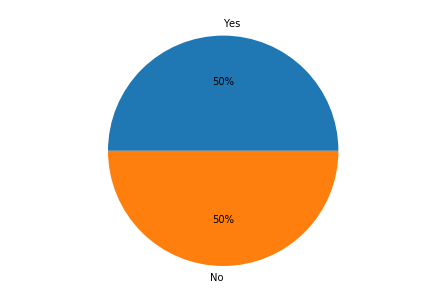

In [3]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
ax.axis('equal') 
labels = ['Yes','No'] 
churn = data.Churn.value_counts() 
ax.pie(churn, labels=labels, autopct='%.0f%%') 
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype == np.number: continue
    #terapkan encoding pada tiap variabel non-numerikal
    data[column] = LabelEncoder().fit_transform(data[column])

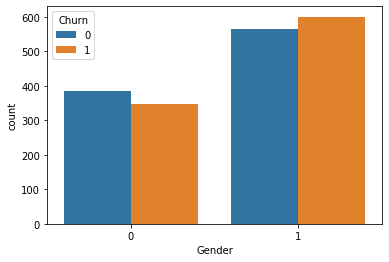

In [8]:
sns.countplot(x='Gender', hue='Churn',data = data)

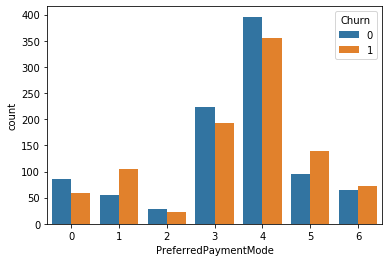

In [9]:
sns.countplot(x='PreferredPaymentMode', hue='Churn',data = data)

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['Tenure','WarehouseToHome','HourSpendOnApp','OrderIncreaseFromLastYear','CouponUsed','OrderCount','DaySinceLastOrder']])
data[['Tenure','WarehouseToHome','HourSpendOnApp','OrderIncreaseFromLastYear','CouponUsed','OrderCount','DaySinceLastOrder']] = imputer.transform(data[['Tenure','WarehouseToHome','HourSpendOnApp','OrderIncreaseFromLastYear','CouponUsed','OrderCount','DaySinceLastOrder']])
data

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50027,0,8.000000,1,2,6.000000,5,1,3.0,2,0,3,0,1,0,13.0,1.0,1.000000,6.0,172.95
50028,0,7.347901,2,2,12.000000,5,1,2.0,2,2,2,0,2,1,20.0,0.0,4.000000,5.0,123.06
50029,0,18.000000,2,0,15.922018,4,1,2.0,2,2,3,1,8,0,18.0,1.0,1.000000,15.0,123.48
50030,0,5.000000,0,2,14.000000,5,0,2.0,2,0,1,2,1,0,14.0,2.0,3.000000,7.0,189.98
50031,0,2.000000,0,0,6.000000,1,1,2.0,2,2,2,0,1,0,13.0,0.0,1.000000,9.0,143.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55599,1,1.000000,0,2,16.000000,5,1,3.0,3,4,4,1,2,0,20.0,2.0,2.000000,1.0,142.90
55603,1,1.000000,1,0,8.000000,3,1,3.0,3,4,0,1,10,1,15.0,3.0,3.000000,3.0,172.87
55605,1,20.000000,2,0,14.000000,1,1,4.0,3,4,2,1,9,0,12.0,7.0,10.000000,9.0,148.39
